## Immuno_Protein_design ##

In [1]:
## This codes used for design a whole novel protein according Immuno Effect
## and other features aslike homologous transmembrane

In [40]:
allele_freq = "/home/jovyan/work/05.pipeline_dev/Antigen_Design/Immu_Epitope_analysis_test/config/HLA_frequency.xlsx"
epitope_mhci_file = "/home/jovyan/work/02.ResDev/12.TAA_epitope_human/05.AML_TAA_Epitope/02.protein_antigen_prediction_new/parsed_res_MHCI/merge.netMHCI.csv"
epitope_mhcii_file = "/home/jovyan/work/02.ResDev/12.TAA_epitope_human/05.AML_TAA_Epitope/02.protein_antigen_prediction_new/parsed_res_MHCII/merge.netMHCII.csv"
fasta_file = "/home/jovyan/work/02.ResDev/12.TAA_epitope_human/05.AML_TAA_Epitope/01.protein_sequence/protein.merge.aa.fasta"
homo_file = "/home/jovyan/work/02.ResDev/12.TAA_epitope_human/05.AML_TAA_Epitope/03.homologous/homo_peptide.bed"

### Step1: Calculate the Immuno_Effect ###

In [2]:
import pandas as pd

In [4]:
epitope_mhci_df = pd.read_csv(epitope_mhci_file,header=0) 
epitope_mhcii_df = pd.read_csv(epitope_mhcii_file,header=0)

In [5]:
epitope_mhcii_df.head()

Pos        MHC          Peptide  Of       Core  Core_Rel         Identity  \
0  151  DRB1_1106  EDRIIYQAHKRLGNR   4  IYQAHKRLG     0.887  sp|P10242|MYB_H   
1  152  DRB1_1106  DRIIYQAHKRLGNRW   3  IYQAHKRLG     0.960  sp|P10242|MYB_H   
2  150  DRB1_1106  EEDRIIYQAHKRLGN   5  IYQAHKRLG     0.880  sp|P10242|MYB_H   
3  153  DRB1_1106  RIIYQAHKRLGNRWA   2  IYQAHKRLG     0.967  sp|P10242|MYB_H   
4  100  DRB1_1106  DQRVIELVQKYGPKR   4  IELVQKYGP     0.780  sp|P10242|MYB_H   

   Score_EL  %Rank_EL  Exp_Bind  Score_BA  Affinity(nM)  %Rank_BA BindLevel  
0  0.970694      0.03       NaN  0.641278         48.49      0.16        SB  
1  0.966064      0.05       NaN  0.652283         43.04      0.11        SB  
2  0.943460      0.14       NaN  0.616315         63.52      0.33        SB  
3  0.912701      0.30       NaN  0.667196         36.63      0.06        SB  
4  0.906237      0.33       NaN  0.552865        126.20      1.34        SB

In [6]:
allele_hlaA_df = pd.read_excel(allele_freq,sheet_name="HLA-A")
allele_hlaB_df = pd.read_excel(allele_freq,sheet_name="HLA-B")
allele_hlaC_df = pd.read_excel(allele_freq,sheet_name="HLA-C")
allele_DRB1_df = pd.read_excel(allele_freq,sheet_name="HLA-DRB1")
allele_DPB1_df = pd.read_excel(allele_freq,sheet_name="HLA-DPB1")
allele_DQB1_df = pd.read_excel(allele_freq,sheet_name="HLA-DQB1")
#MHCI_hla = pd.concat([allele_hlaA_df,allele_hlaB_df,allele_hlaC_df])
#MHCII_hla = pd.concat([allele_DRB1_df,allele_DPB1_df,allele_DQB1_df])
allele_hlaA_df.allele = "HLA-" + allele_hlaA_df.allele
allele_hlaB_df.allele = "HLA-" + allele_hlaB_df.allele
allele_hlaC_df.allele = "HLA-" + allele_hlaC_df.allele
allele_mhci_dict = {"hlaA":allele_hlaA_df,"hlaB":allele_hlaB_df,"hlaC":allele_hlaC_df}
allele_mhcii_dict = {"hlaDRB1":allele_DRB1_df,"hlaDPB1":allele_DPB1_df,"hlaDQB1":allele_DQB1_df}

In [7]:
MHCI_allele_dict = pd.concat([allele_hlaA_df,allele_hlaB_df,allele_hlaC_df])
MHCII_allele_dict = pd.concat([allele_DRB1_df,allele_DPB1_df,allele_DQB1_df])
all_allele_dict = pd.concat([allele_hlaA_df,allele_hlaB_df,allele_hlaC_df,allele_DRB1_df,allele_DPB1_df,allele_DQB1_df])

In [8]:
allele_DRB1_df.head()

allele      counts  loci_num  frequency allele_netmhc
0  DRB1*09:01  15224.0574     49566     0.1536     DRB1_0901
1  DRB1*15:01  11133.7716     49566     0.1123     DRB1_1501
2  DRB1*12:02   9723.6174     49566     0.0981     DRB1_1202
3  DRB1*07:01   7361.2470     49566     0.0743     DRB1_0701
4  DRB1*08:03   6523.2832     49566     0.0658     DRB1_0803

In [39]:
'''
Immuno_eff_dict = {}
with open(fasta_file,"r") as faf:
    for line in faf.readlines():
        if line.startswith(">sp"):
            print(line)
            unipID = line.split("|")[1]
        else:
            protSeq = line.strip()
            Immuno_eff_dict[unipID] = [0 for i in range(len(protSeq))]
            
            epitope_this_df = epitope_df[epitope_df["Identity"].str.contains(unipID)]
            #epitope_this_df = epitope_this_df.sort_values(by=['Pos'])
            epitope_this_df = epitope_this_df[(epitope_this_df["BindLevel"]=="WB") | (epitope_this_df["BindLevel"]=="SB")]
            epitope_this_wtfreq_df = pd.merge(epitope_this_df, MHCI_hla, left_on="MHC",right_on="allele")
            epitope_this_wtfreq_df["Immuno_score"] = -(2**(epitope_this_wtfreq_df["%Rank_EL"]/2))+2
            epitope_this_wtfreq_df["Immuno_eff"] = epitope_this_wtfreq_df["Immuno_score"]* epitope_this_wtfreq_df["frequency"]
            epitope_this_wtfreq_df = epitope_this_wtfreq_df.sort_values(by=['Pos'])
            #Peptide = epitope_this_df.loc[426780,"Peptide"]
            #Rank_EL = epitope_this_df.loc[426780,"Peptide"]
            indexlist = epitope_this_wtfreq_df.index.to_list()
            for index in indexlist:
                Peptide =  epitope_this_wtfreq_df.loc[index,"Peptide"]
                Immuno_eff = float(epitope_this_wtfreq_df.loc[index,"Immuno_eff"])
                Pos = int(epitope_this_wtfreq_df.loc[index,"Pos"])
                #print(protSeq[Pos-1:Pos+len(Peptide)-1])
                for ipos in range(Pos-1, Pos+len(Peptide)-1):
                    Immuno_eff_dict[unipID][ipos] += Immuno_eff
            
            #print(epitope_this_wtfreq_df.head(50))
            #input("Press Enter to continue...")
'''
print("")

In [10]:
###  HLA_A/B/C
Immuno_eff_all_allele_dict = {}
with open(fasta_file,"r") as faf:
    for line in faf.readlines():
        if line.startswith(">sp"):
            print(line)
            unipID = line.split("|")[1]
            genename = line.split("|")[2].split("_")[0]
            TAAid = "_".join([genename,unipID])
        else:
            protSeq = line.strip()
            Immuno_eff_all_allele_dict[TAAid] = {}
            
            epitope_this_df = epitope_mhci_df[epitope_mhci_df["Identity"].str.contains(unipID)]
            #epitope_this_df = epitope_this_df.sort_values(by=['Pos'])
            epitope_this_df = epitope_this_df[(epitope_this_df["BindLevel"]=="WB") | (epitope_this_df["BindLevel"]=="SB")]
            
            for allele in allele_mhci_dict:
                print(allele)
                Immuno_eff_all_allele_dict[TAAid][allele] = [0 for i in range(len(protSeq))]
                allele_freq_file = allele_mhci_dict[allele]
                epitope_this_wtfreq_df = pd.merge(epitope_this_df, allele_freq_file, left_on="MHC",right_on="allele")
                epitope_this_wtfreq_df["Immuno_score"] = -(2**(epitope_this_wtfreq_df["%Rank_EL"]/2))+2
                epitope_this_wtfreq_df["Immuno_eff"] = epitope_this_wtfreq_df["Immuno_score"]* epitope_this_wtfreq_df["frequency"]
                #Peptide = epitope_this_df.loc[426780,"Peptide"]
                #Rank_EL = epitope_this_df.loc[426780,"Peptide"]
                hla_type_list = list(epitope_this_wtfreq_df.MHC.unique())
                for iHLA in hla_type_list:
                    #print(iHLA)
                    immuno_eff_list = [[0] for i in range(len(protSeq))]
                    epitope_this_wtfreq_hla_df = epitope_this_wtfreq_df[epitope_this_wtfreq_df["MHC"]==iHLA]
                    epitope_this_wtfreq_hla_df = epitope_this_wtfreq_hla_df.sort_values(by=['Pos'])
                    indexlist = epitope_this_wtfreq_hla_df.index.to_list()
                    for index in indexlist:
                        Peptide =  epitope_this_wtfreq_hla_df.loc[index,"Peptide"]
                        Immuno_eff = float(epitope_this_wtfreq_hla_df.loc[index,"Immuno_eff"])
                        Pos = int(epitope_this_wtfreq_hla_df.loc[index,"Pos"])
                        #print(protSeq[Pos-1:Pos+len(Peptide)-1])
                        for ipos in range(Pos-1, Pos+len(Peptide)-1):
                            immuno_eff_list[ipos].append(Immuno_eff)
                    #print(immuno_eff_list)
                    for ipos in range(len(protSeq)):
                        immuno_eff_max = max(immuno_eff_list[ipos])
                        Immuno_eff_all_allele_dict[TAAid][allele][ipos] += immuno_eff_max
                    #print(Immuno_eff_dict[TAAid])
                    #input("Press Enter to continue...")
            #print(epitope_this_wtfreq_df.head(50))
            

>sp|P30939|5HT1F_HUMAN 5-hydroxytryptamine receptor 1F OS=Homo sapiens OX=9606 GN=HTR1F PE=1 SV=1

hlaA
hlaB
hlaC
>sp|Q00534|CDK6_HUMAN Cyclin-dependent kinase 6 OS=Homo sapiens OX=9606 GN=CDK6 PE=1 SV=1

hlaA
hlaB
hlaC
>sp|Q5HYN5|CT451_HUMAN Cancer/testis antigen family 45 member A1 OS=Homo sapiens OX=9606 GN=CT45A1 PE=1 SV=1

hlaA
hlaB
hlaC
>sp|Q8IYM0|F186B_HUMAN Protein FAM186B OS=Homo sapiens OX=9606 GN=FAM186B PE=2 SV=2

hlaA
hlaB
hlaC
>sp|O75388|GPR32_HUMAN Probable G-protein coupled receptor 32 OS=Homo sapiens OX=9606 GN=GPR32 PE=2 SV=1

hlaA
hlaB
hlaC
>sp|P15814|IGLL1_HUMAN Immunoglobulin lambda-like polypeptide 1 OS=Homo sapiens OX=9606 GN=IGLL1 PE=1 SV=1

hlaA
hlaB
hlaC
>sp|P10242|MYB_HUMAN Transcriptional activator Myb OS=Homo sapiens OX=9606 GN=MYB PE=1 SV=2

hlaA
hlaB
hlaC
>sp|Q01851|PO4F1_HUMAN POU domain, class 4, transcription factor 1 OS=Homo sapiens OX=9606 GN=POU4F1 PE=1 SV=4

hlaA
hlaB
hlaC
>sp|Q96A99|PTX4_HUMAN Pentraxin-4 OS=Homo sapiens OX=9606 GN=PTX4 PE=2 SV=2


In [29]:
###  HLA_DRB1/
with open(fasta_file,"r") as faf:
    for line in faf.readlines():
        if line.startswith(">sp"):
            print(line)
            unipID = line.split("|")[1]
            genename = line.split("|")[2].split("_")[0]
            TAAid = "_".join([genename,unipID])
        else:
            protSeq = line.strip()
            
            epitope_this_df = epitope_mhcii_df[epitope_mhcii_df["Identity"].str.contains(unipID)]
            #epitope_this_df = epitope_this_df.sort_values(by=['Pos'])
            epitope_this_df = epitope_this_df[(epitope_this_df["BindLevel"]=="WB") | (epitope_this_df["BindLevel"]=="SB")]
            
            for allele in allele_mhcii_dict:
                #print(allele)
                Immuno_eff_all_allele_dict[TAAid][allele] = [0 for i in range(len(protSeq))]
                allele_freq_file = allele_mhcii_dict[allele]
                epitope_this_wtfreq_df = pd.merge(epitope_this_df, allele_freq_file, left_on="MHC",right_on="allele_netmhc")
                epitope_this_wtfreq_df["Immuno_score"] = -(2**(epitope_this_wtfreq_df["%Rank_EL"]/10))+2
                epitope_this_wtfreq_df["Immuno_eff"] = epitope_this_wtfreq_df["Immuno_score"]* epitope_this_wtfreq_df["frequency"]
                #Peptide = epitope_this_df.loc[426780,"Peptide"]
                #Rank_EL = epitope_this_df.loc[426780,"Peptide"]
                hla_type_list = list(epitope_this_wtfreq_df.MHC.unique())
                for iHLA in hla_type_list:
                    #print(iHLA)
                    immuno_eff_list = [[0] for i in range(len(protSeq))]
                    epitope_this_wtfreq_hla_df = epitope_this_wtfreq_df[epitope_this_wtfreq_df["MHC"]==iHLA]
                    epitope_this_wtfreq_hla_df = epitope_this_wtfreq_hla_df.sort_values(by=['Pos'])
                    indexlist = epitope_this_wtfreq_hla_df.index.to_list()
                    for index in indexlist:
                        Peptide =  epitope_this_wtfreq_hla_df.loc[index,"Peptide"]
                        Immuno_eff = float(epitope_this_wtfreq_hla_df.loc[index,"Immuno_eff"])
                        Pos = int(epitope_this_wtfreq_hla_df.loc[index,"Pos"])
                        #print(protSeq[Pos-1:Pos+len(Peptide)-1])
                        for ipos in range(Pos-1, Pos+len(Peptide)-1):
                            immuno_eff_list[ipos].append(Immuno_eff)
                    #print(immuno_eff_list)
                    for ipos in range(len(protSeq)):
                        immuno_eff_max = max(immuno_eff_list[ipos])
                        Immuno_eff_all_allele_dict[TAAid][allele][ipos] += immuno_eff_max
                    #print(Immuno_eff_all_allele_dict[TAAid][allele])
                    #input("Press Enter to continue...")


>sp|P30939|5HT1F_HUMAN 5-hydroxytryptamine receptor 1F OS=Homo sapiens OX=9606 GN=HTR1F PE=1 SV=1

>sp|Q00534|CDK6_HUMAN Cyclin-dependent kinase 6 OS=Homo sapiens OX=9606 GN=CDK6 PE=1 SV=1

>sp|Q5HYN5|CT451_HUMAN Cancer/testis antigen family 45 member A1 OS=Homo sapiens OX=9606 GN=CT45A1 PE=1 SV=1

>sp|Q8IYM0|F186B_HUMAN Protein FAM186B OS=Homo sapiens OX=9606 GN=FAM186B PE=2 SV=2

>sp|O75388|GPR32_HUMAN Probable G-protein coupled receptor 32 OS=Homo sapiens OX=9606 GN=GPR32 PE=2 SV=1

>sp|P15814|IGLL1_HUMAN Immunoglobulin lambda-like polypeptide 1 OS=Homo sapiens OX=9606 GN=IGLL1 PE=1 SV=1

>sp|P10242|MYB_HUMAN Transcriptional activator Myb OS=Homo sapiens OX=9606 GN=MYB PE=1 SV=2

>sp|Q01851|PO4F1_HUMAN POU domain, class 4, transcription factor 1 OS=Homo sapiens OX=9606 GN=POU4F1 PE=1 SV=4

>sp|Q96A99|PTX4_HUMAN Pentraxin-4 OS=Homo sapiens OX=9606 GN=PTX4 PE=2 SV=2

>sp|Q6ZV50|RFX8_HUMAN DNA-binding protein RFX8 OS=Homo sapiens OX=9606 GN=RFX8 PE=2 SV=2

>sp|P04053|TDT_HUMAN DNA nucl

In [30]:
for TAAid in Immuno_eff_all_allele_dict.keys():
    print(TAAid)
    for allele in Immuno_eff_all_allele_dict[TAAid]:
        length = len(Immuno_eff_all_allele_dict[TAAid][allele])
    Immuno_eff_all_allele_dict[TAAid]["allele_merge"] = [0 for i in range(length)]
    for allele in Immuno_eff_all_allele_dict[TAAid]:
        if allele != "allele_merge":
            #print(allele)
            for ipos,imm_eff in enumerate(Immuno_eff_all_allele_dict[TAAid][allele]):
                #print(ipos,imm_eff)
                Immuno_eff_all_allele_dict[TAAid]["allele_merge"][ipos] += imm_eff


5HT1F_P30939
CDK6_Q00534
CT451_Q5HYN5
F186B_Q8IYM0
GPR32_O75388
IGLL1_P15814
MYB_P10242
PO4F1_Q01851
PTX4_Q96A99
RFX8_Q6ZV50
TDT_P04053
TPOR_P40238
WT1_P19544


In [24]:
#Immuno_eff_all_allele_dict["5HT1F_P30939"]["hlaA"]

## Draw plot

In [25]:
import matplotlib.pyplot as plt

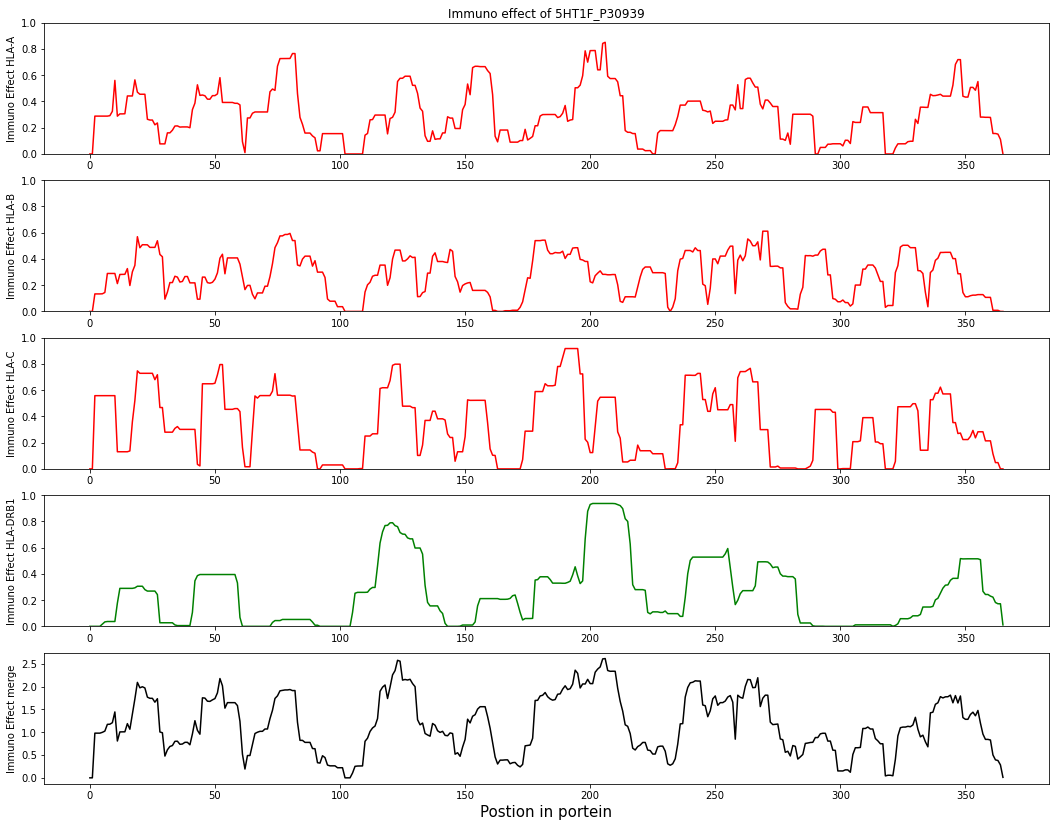

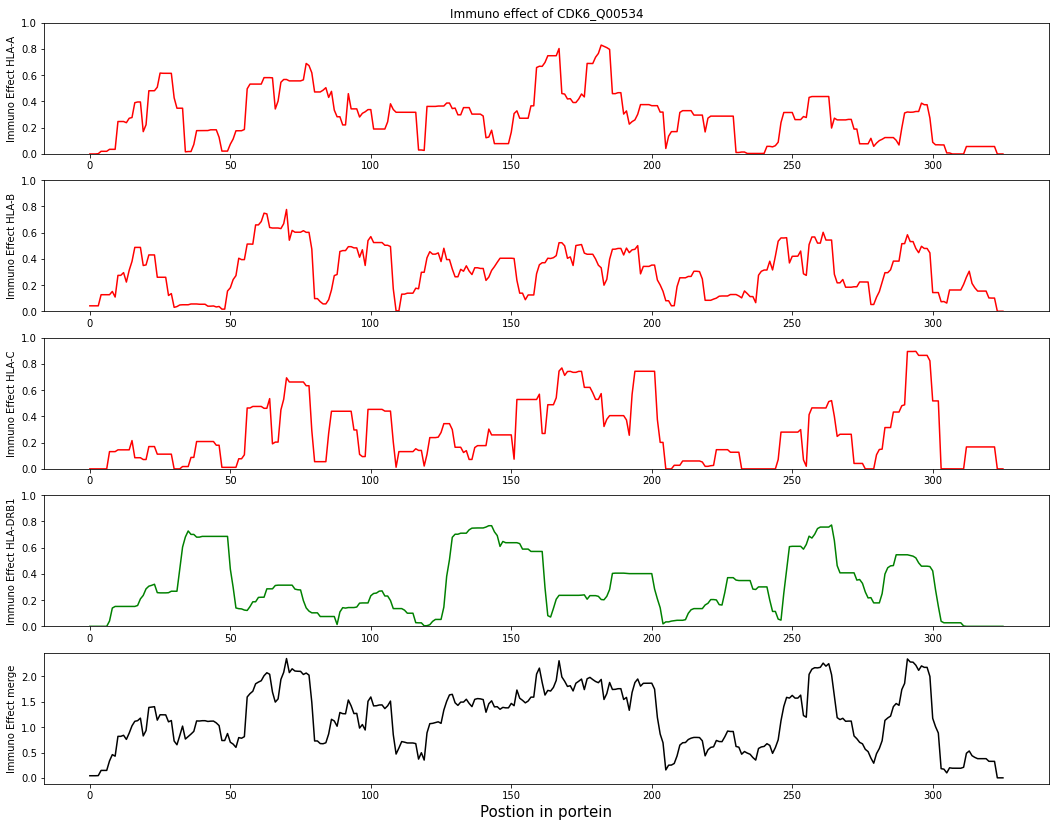

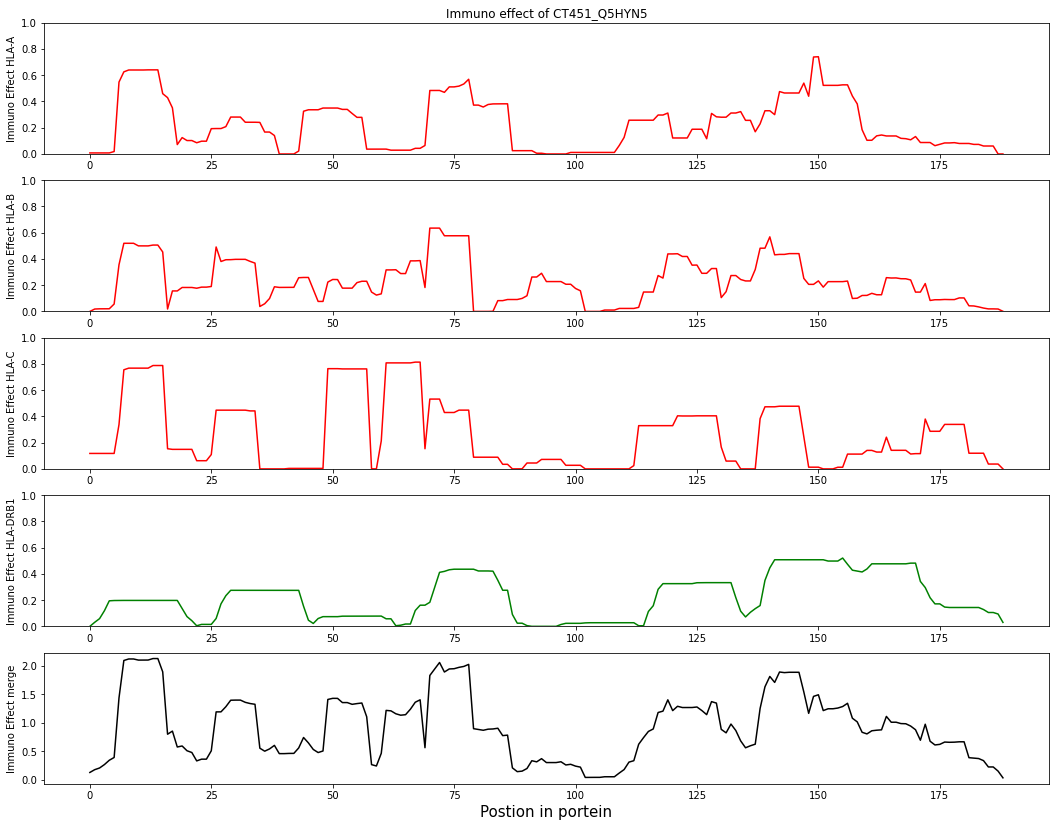

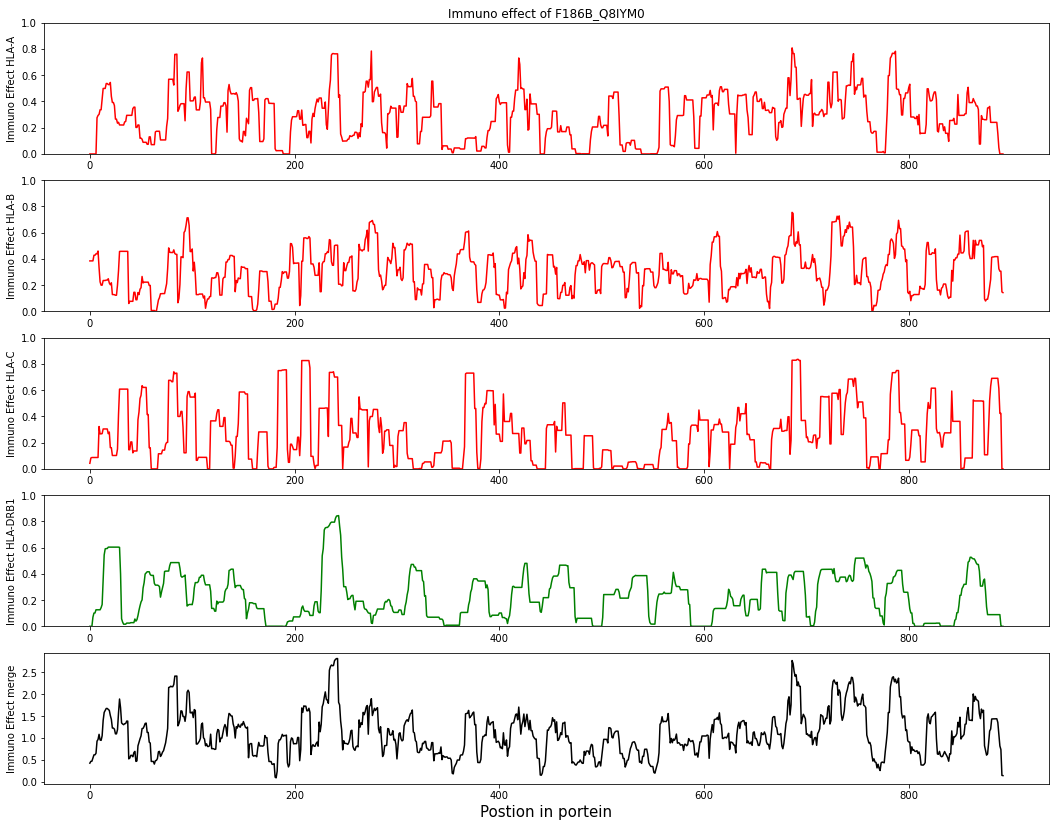

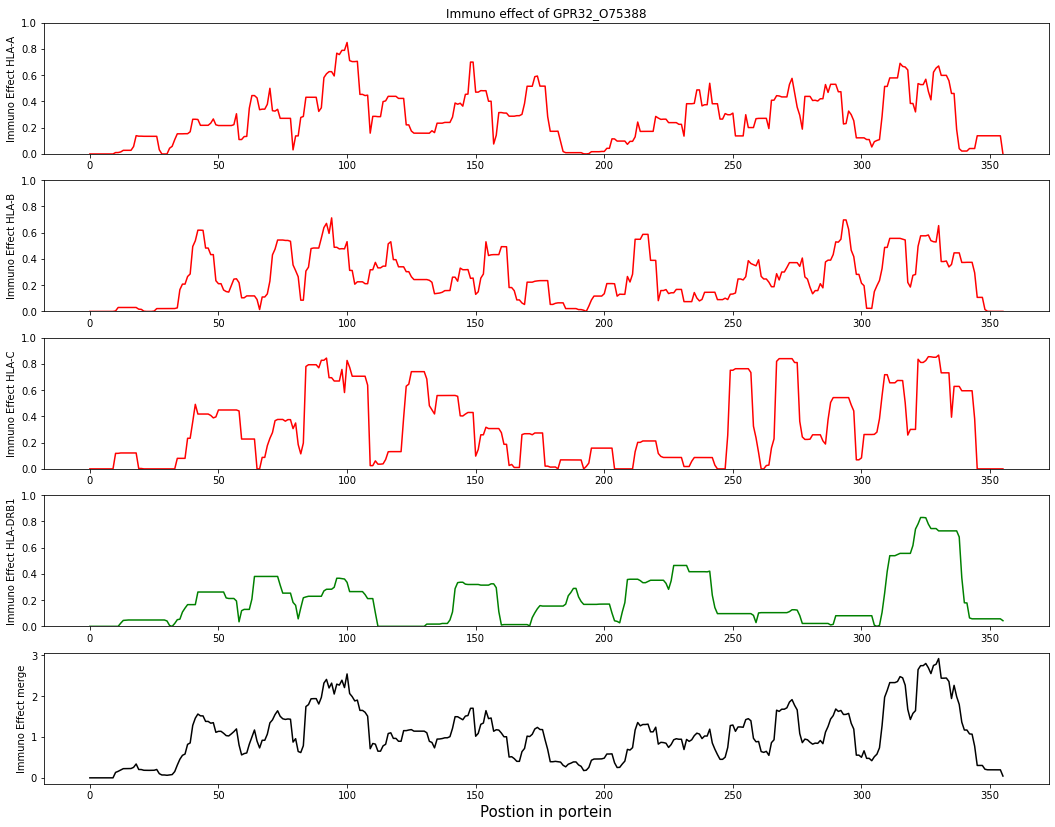

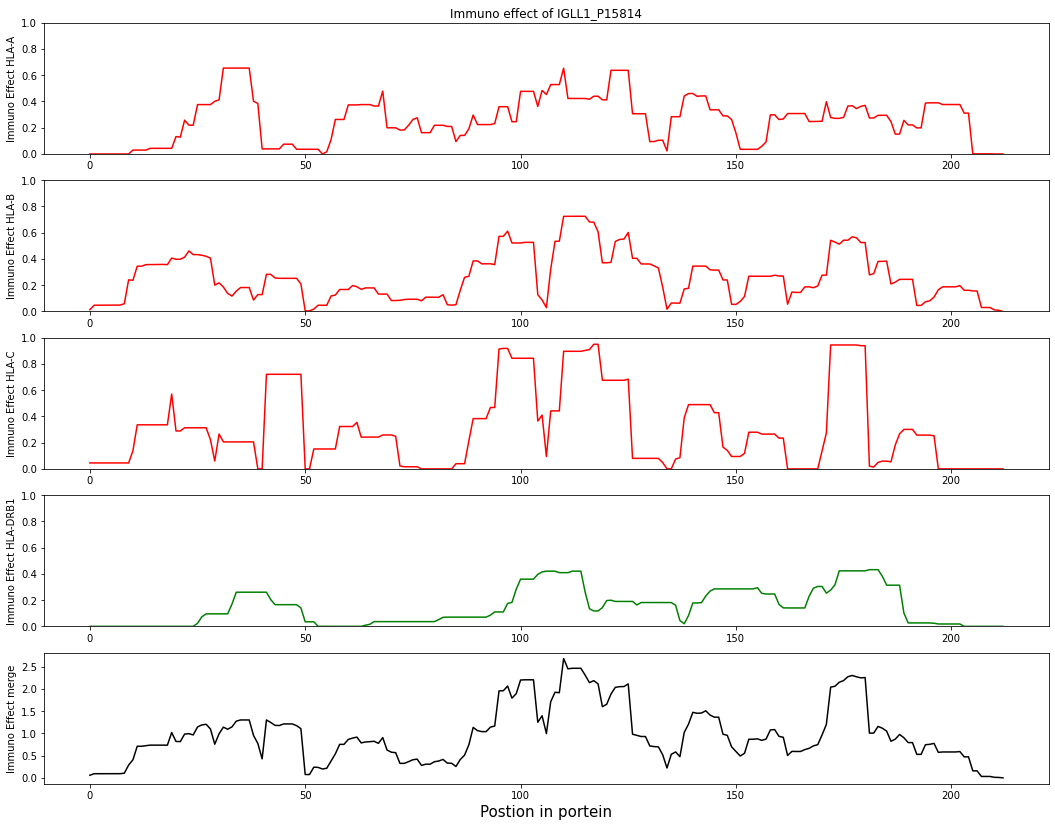

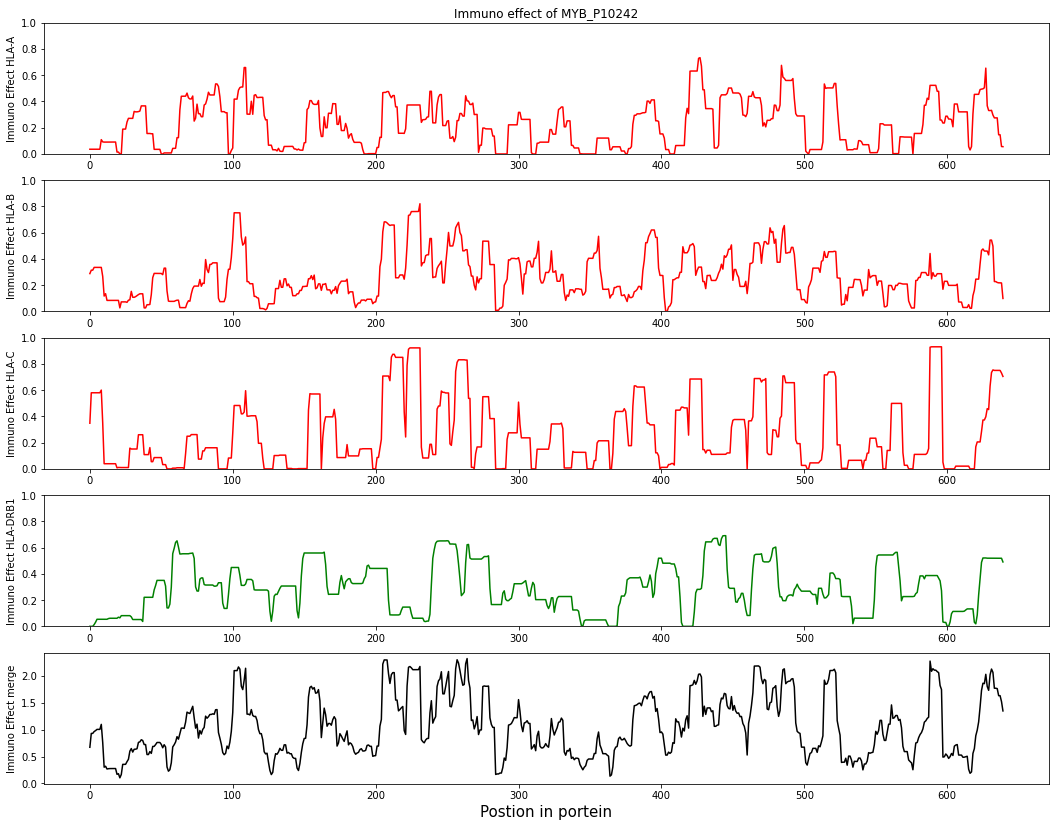

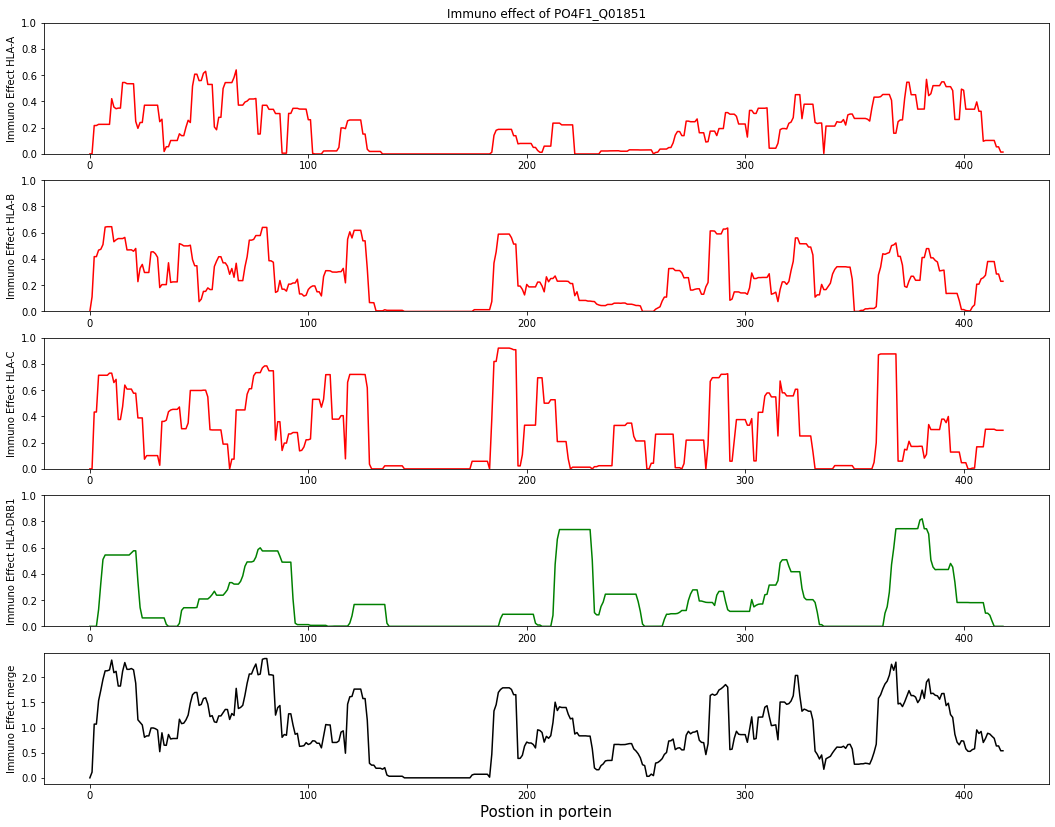

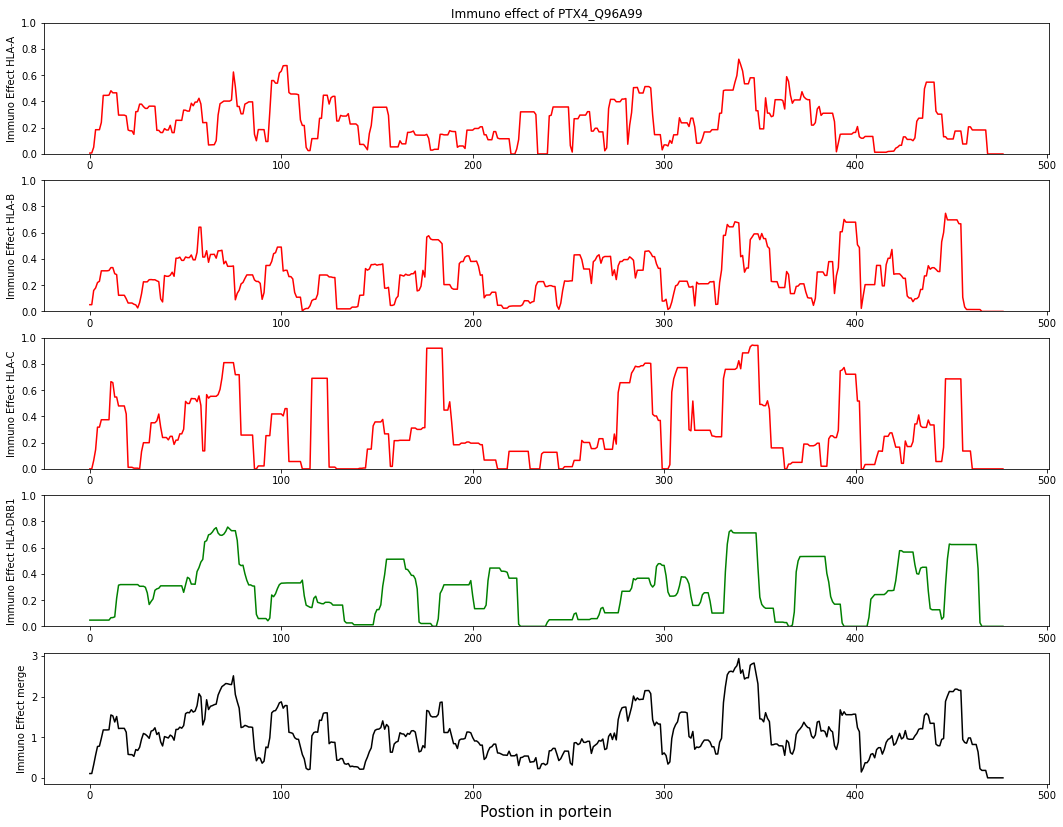

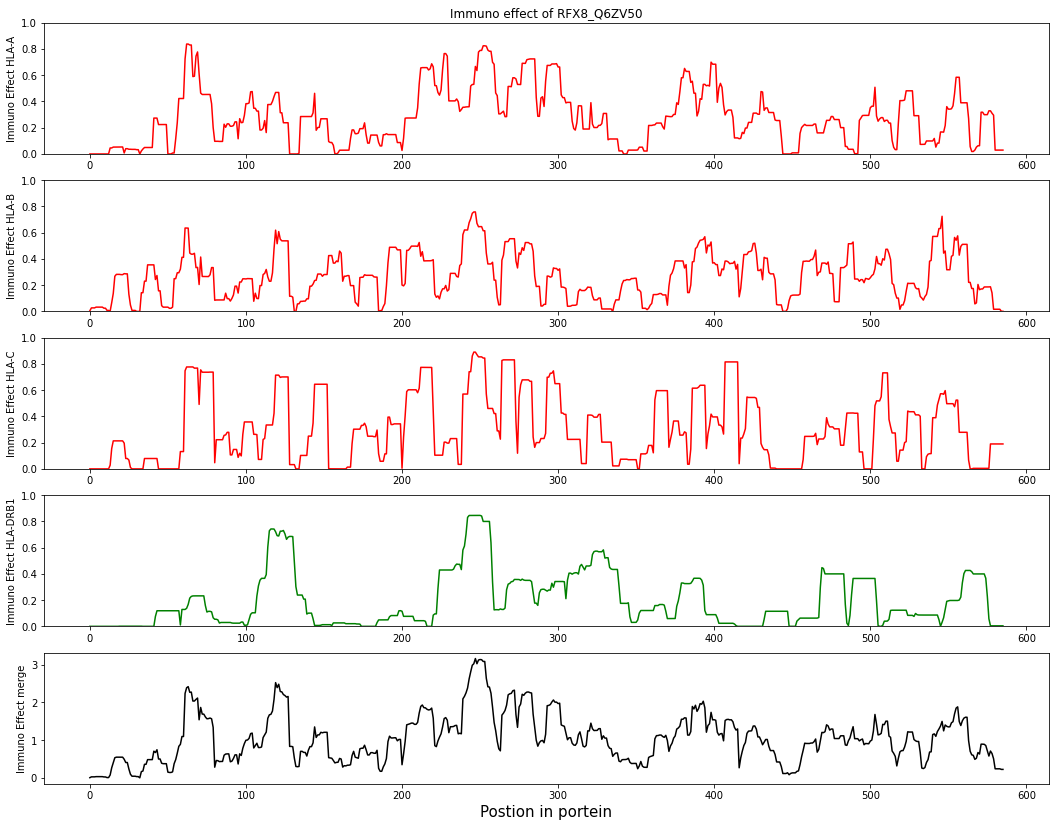

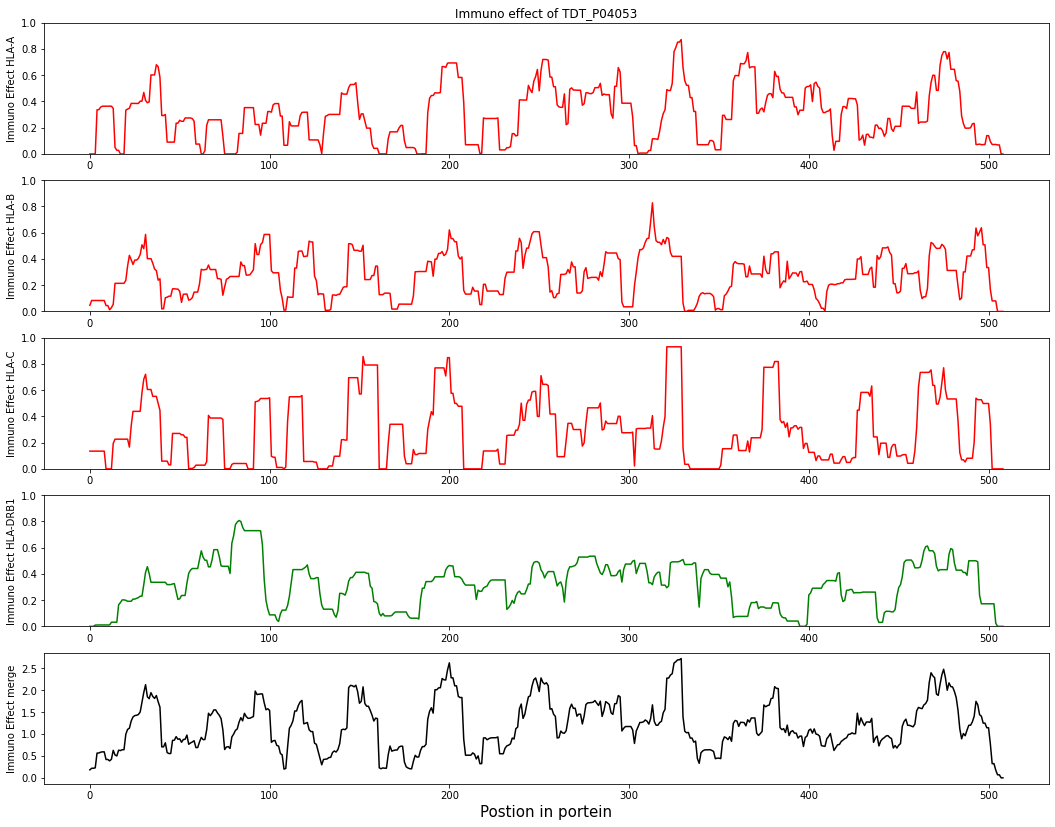

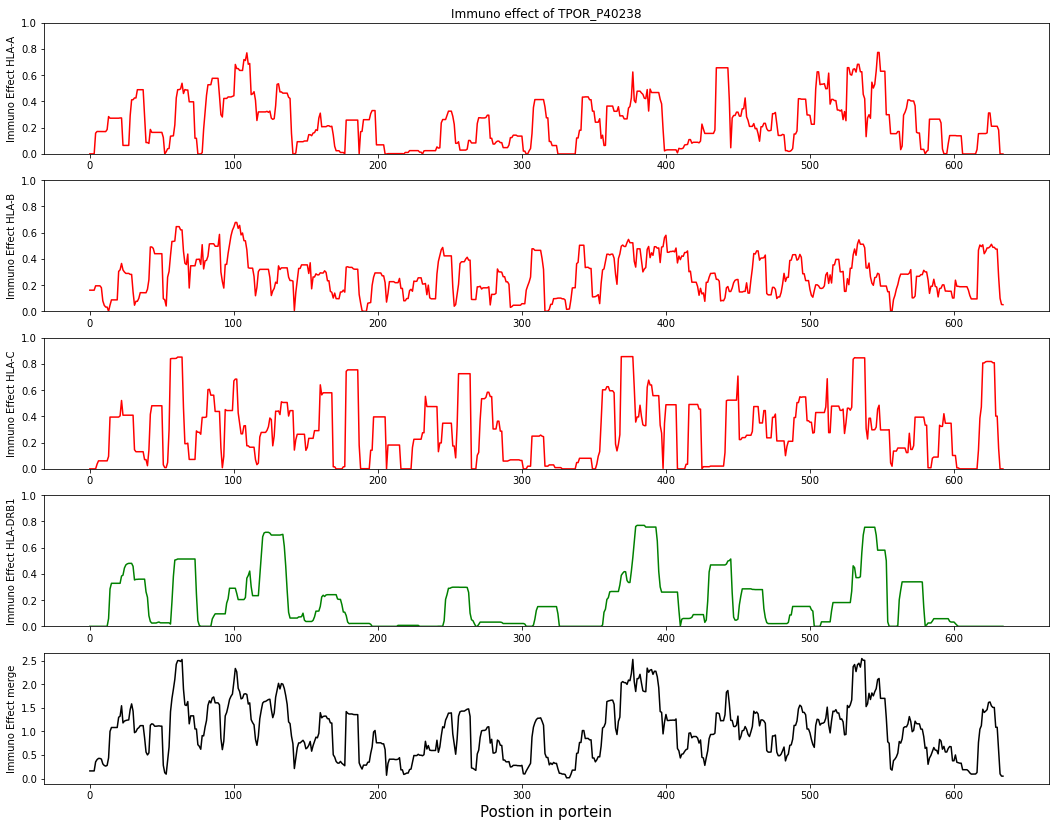

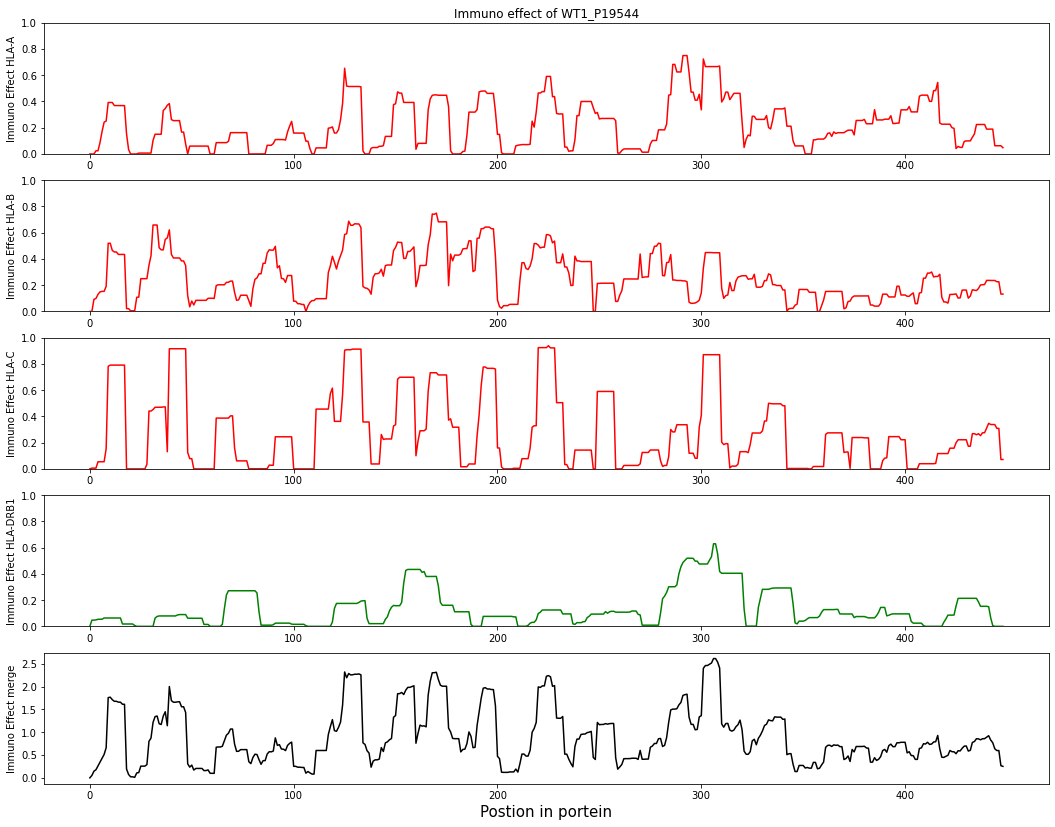

In [38]:
for TAA in Immuno_eff_all_allele_dict:
    fig,(ax_hlaA,ax_hlaB,ax_hlaC,ax_hlaDRB1,ax_merge) = plt.subplots(5,1,figsize=(18,14))
    
    for allele in Immuno_eff_all_allele_dict[TAA]:
        x = list(range(len(Immuno_eff_all_allele_dict[TAA][allele])))
        y = Immuno_eff_all_allele_dict[TAA][allele]
        if allele=="hlaA":
            ax_hlaA.plot(x,y,color="red")
            ax_hlaA.set_ylim(0,1)
            ax_hlaA.title.set_text("Immuno effect of {}".format(TAA))
            ax_hlaA.set_ylabel("Immuno Effect HLA-A",size=10)
        elif allele=="hlaB":
            ax_hlaB.plot(x,y,color="red")
            ax_hlaB.set_ylim(0,1)
            ax_hlaB.set_ylabel("Immuno Effect HLA-B",size=10)
        elif allele=="hlaC":
            ax_hlaC.plot(x,y,color="red")
            ax_hlaC.set_ylim(0,1)
            ax_hlaC.set_ylabel("Immuno Effect HLA-C",size=10)
        elif allele=="hlaDRB1":
            ax_hlaDRB1.plot(x,y,color="green")
            ax_hlaDRB1.set_ylim(0,1)
            ax_hlaDRB1.set_ylabel("Immuno Effect HLA-DRB1",size=10)
        elif allele=="allele_merge":
            ax_merge.plot(x,y,color="black")
            #ax_merge.set_ylim(0.0,5.0)
            ax_merge.set_xlabel("Postion in portein",size=15)
            ax_merge.set_ylabel("Immuno Effect merge",size=10)
    plt.show()
    #input("please enter your input")

In [34]:
print("a")

a


## Step2: Select sequence  ##

In [ ]:
import copy
max_load_length =600
ligand="XXXXXXXXXXXXXXX"
immu_eff_merge_init = 2

In [61]:
Immuno_eff_all_allele_dict_withhomo = copy.deepcopy(Immuno_eff_all_allele_dict)
for TAA in Immuno_eff_all_allele_dict_withhomo.keys():
    #print(key)
    Immuno_eff_all_allele_dict_withhomo[TAA]["withhomo"] = copy.deepcopy(Immuno_eff_all_allele_dict_withhomo[TAA]["allele_merge"])
with open(homo_file,"r") as homof:
    for line in homof.readlines():
        if line.startswith("sp|"):
            unipid = line.split("|")[1]
            genename = line.split("|")[2].split("_")[0]
            TAAid = "_".join([genename,unipid])
            iposs = int(line.split('\t')[1])
            ipose = int(line.split('\t')[2])
            #print(TAAid,iposs-1,ipose)
            for ipos in range(iposs-1,ipose):
                Immuno_eff_all_allele_dict_withhomo[TAAid]["withhomo"][ipos] = -0.5

In [ ]:
TAA_seq_dict = {}
with open(fasta_file,"r") as faf:
    for line in faf.readlines():
        if line.startswith(">sp"):
            #print(line)
            unipID = line.split("|")[1]
            genename = line.split("|")[2].split("_")[0]
            TAAid = "_".join([genename,unipID])
        else:
            protSeq = line.strip()
            TAA_seq_dict[TAAid] = protSeq

In [ ]:
epitope_seq = ""
temp_high_seq = ""
temp_low_seq = ""
for TAA in Immuno_eff_all_allele_dict_withhomo.keys():
    print(len(Immuno_eff_all_allele_dict_withhomo[TAA]["withhomo"]),len(TAA_seq_dict[TAA]))
    high_start_flag = "NO"
    for ipos,immuno_eff in enumerate(Immuno_eff_all_allele_dict_withhomo[TAA]["withhomo"]):
        if immuno_eff >= immu_eff_merge_init:
            temp_high_seq += TAA_seq_dict[TAA][ipos]
            if high_start_flag == "NO":
                high_start_flag = "YES"
                if len(temp_low_seq) >= len(ligand):
                    epitope_seq += ligand
                else:
                    epitope_seq += temp_low_seq
                temp_low_seq = ""
            
        else:
            high_start_flag = "NO"
            if len(temp_high_seq) > len(ligand):
                epitope_seq += temp_high_seq
            else:
                temp_low_seq += TAA_seq_dict[TAA][ipos]
            temp_high_seq = ""
print(epitope_seq)   

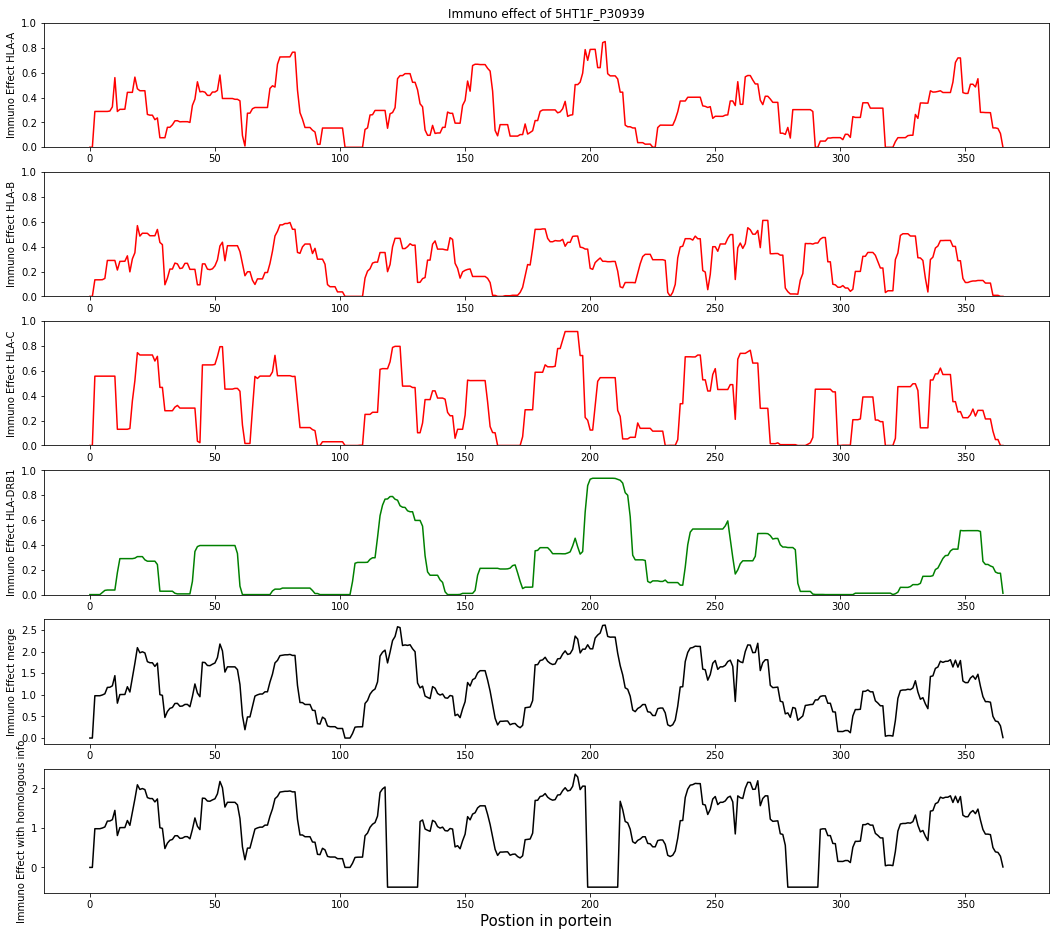

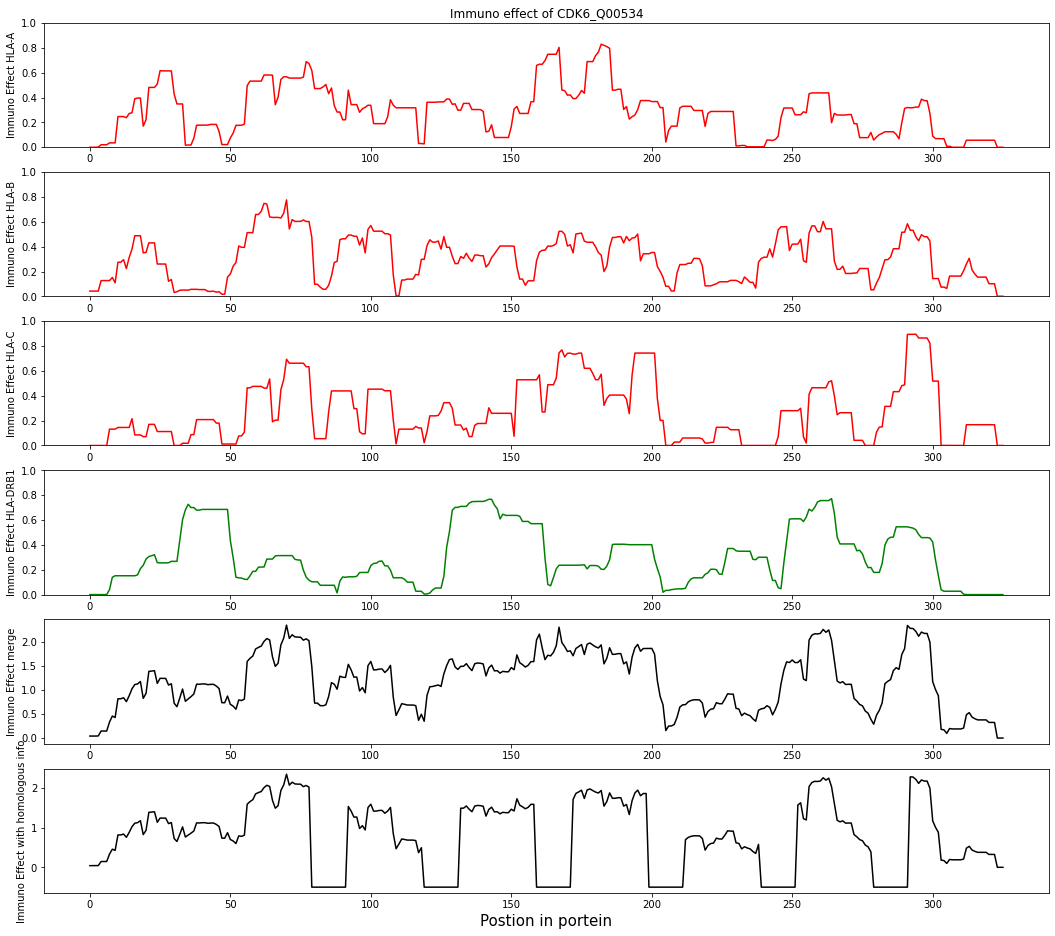

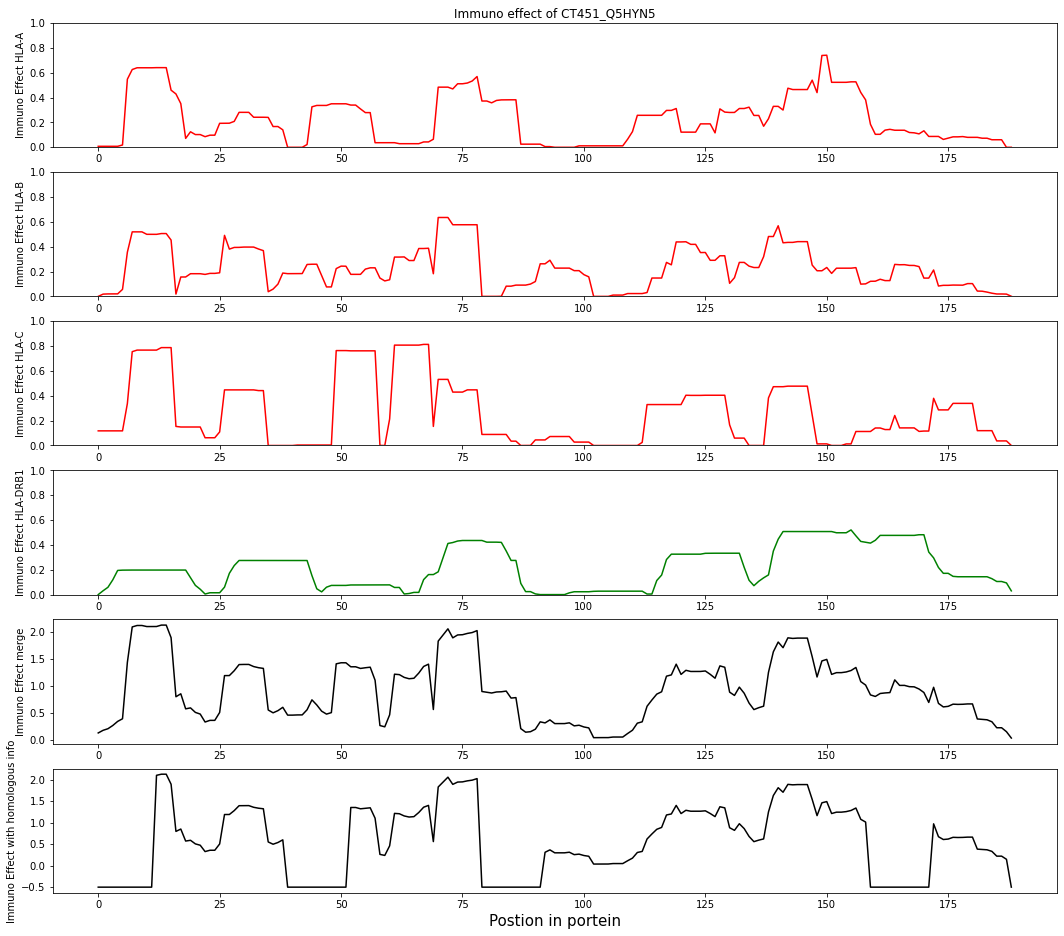

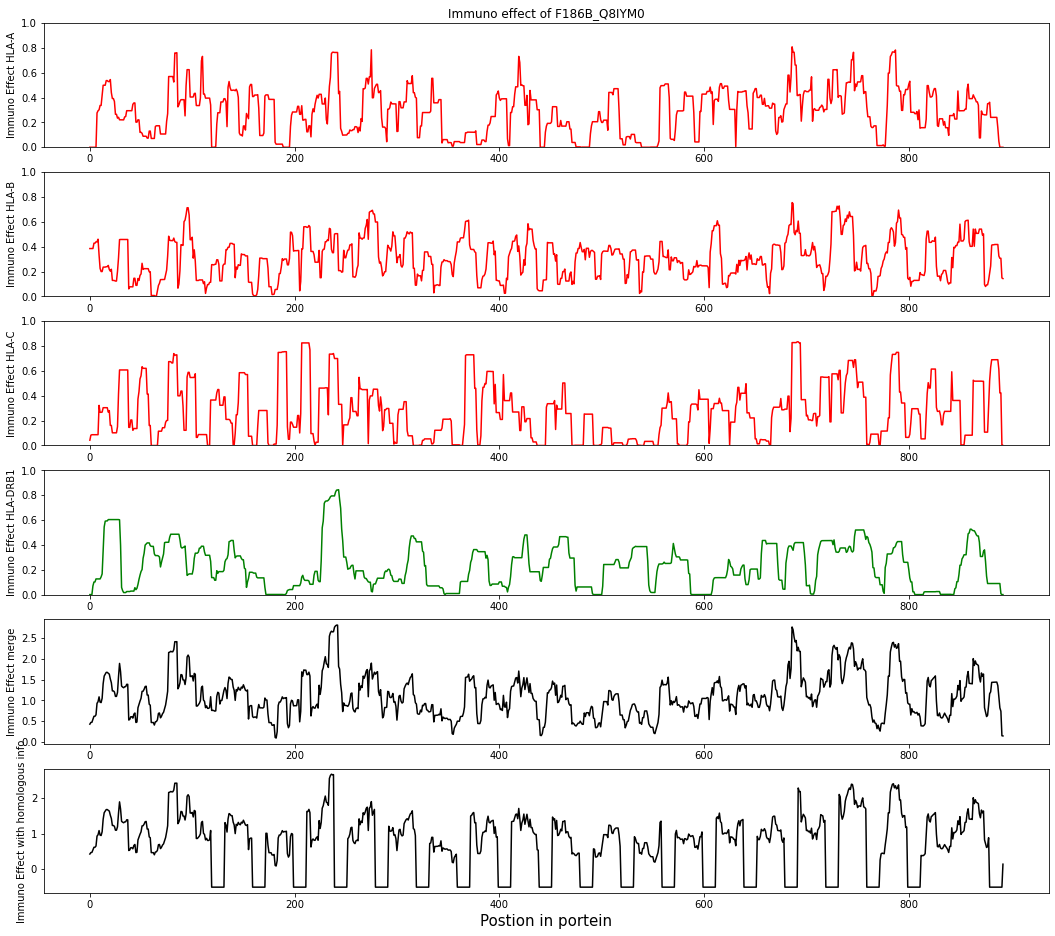

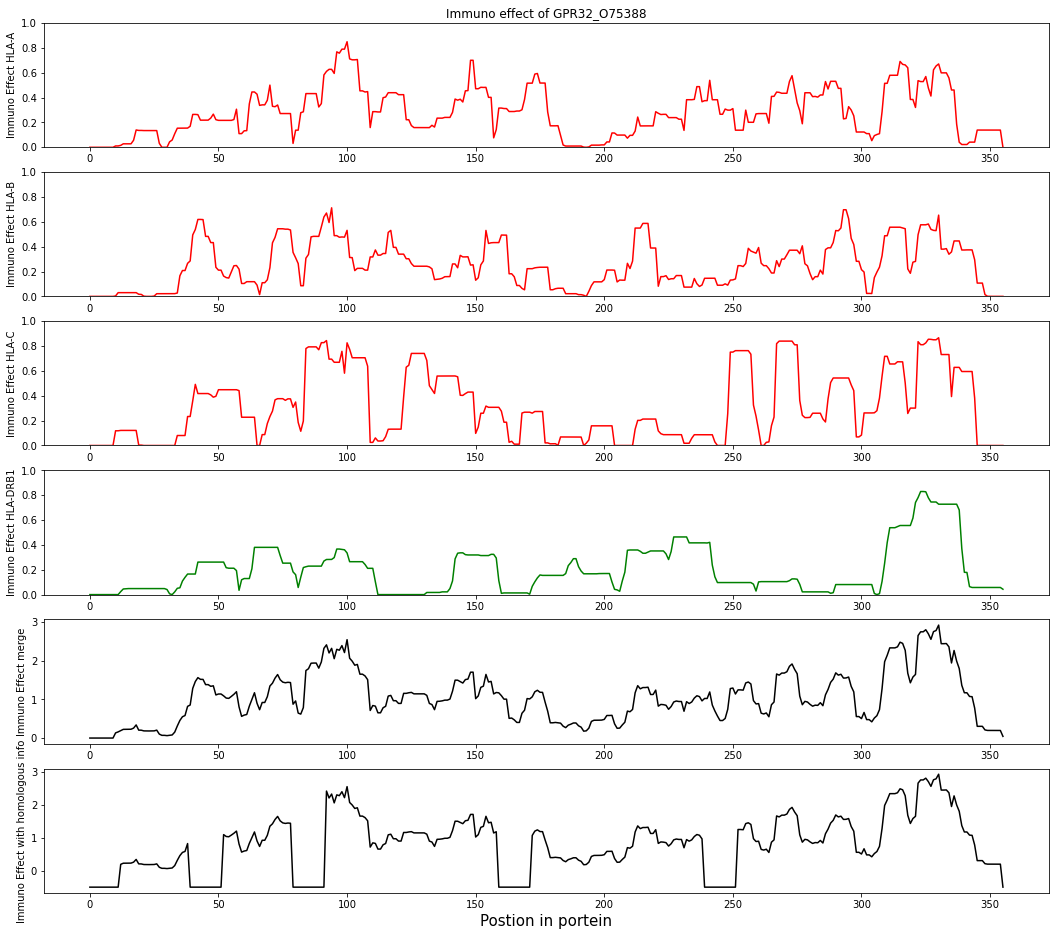

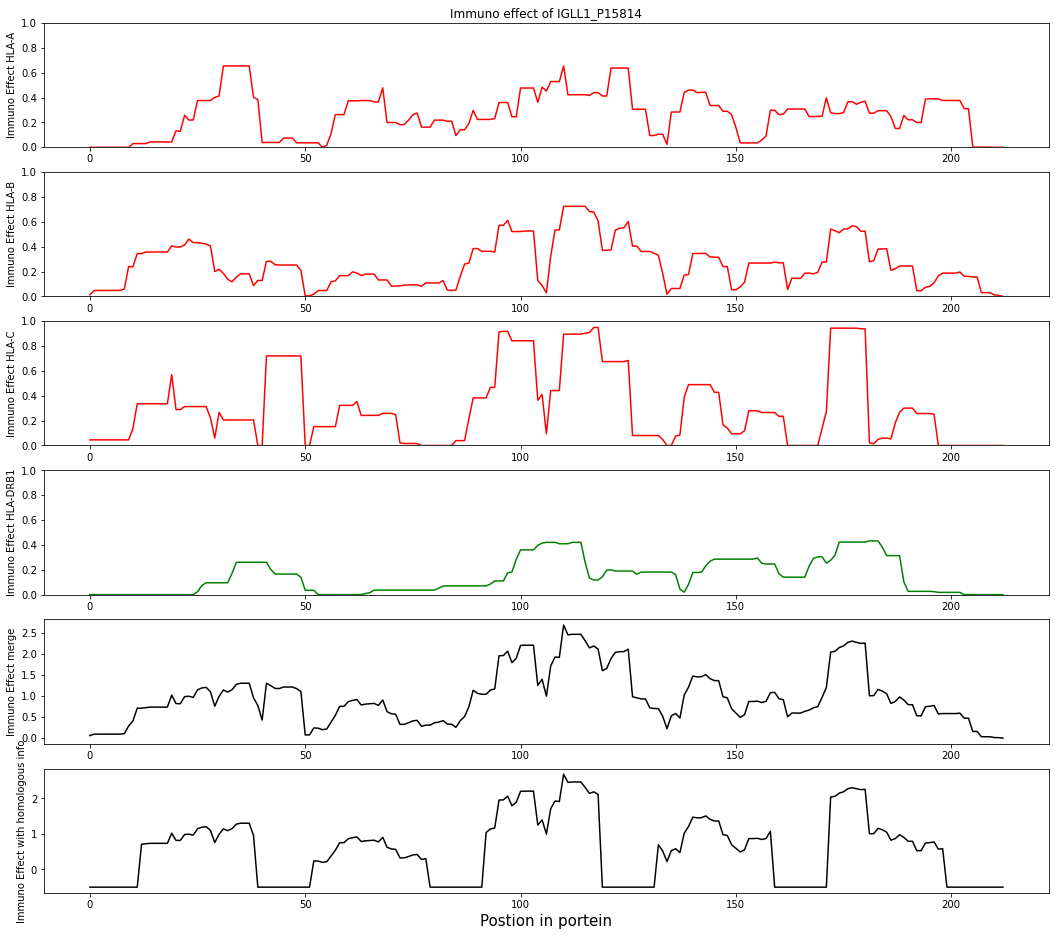

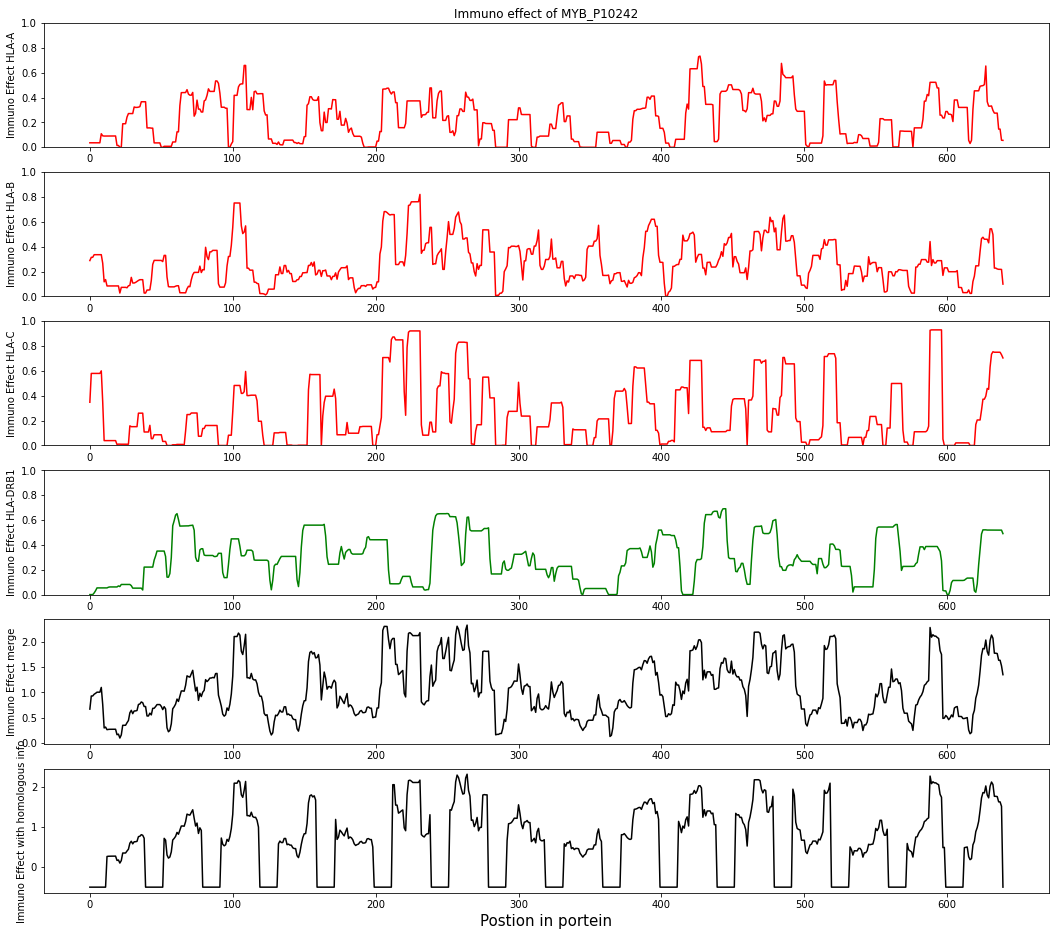

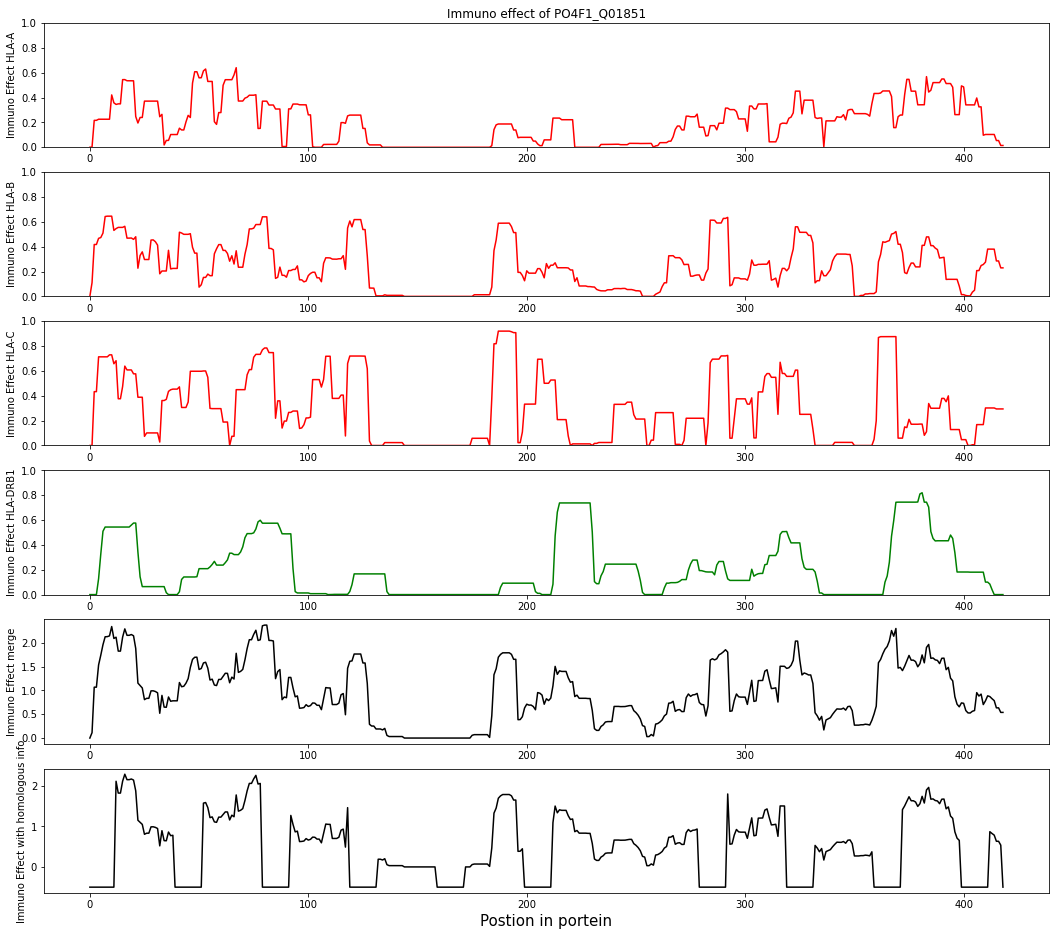

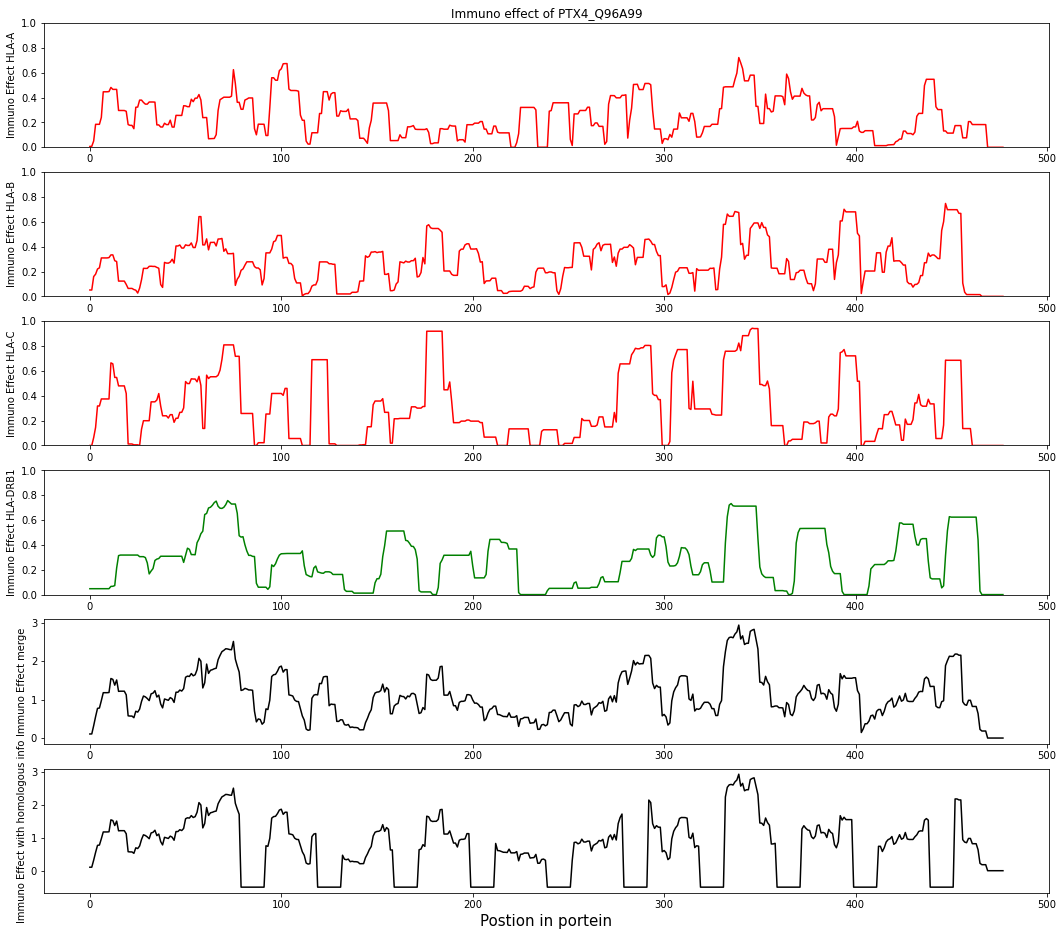

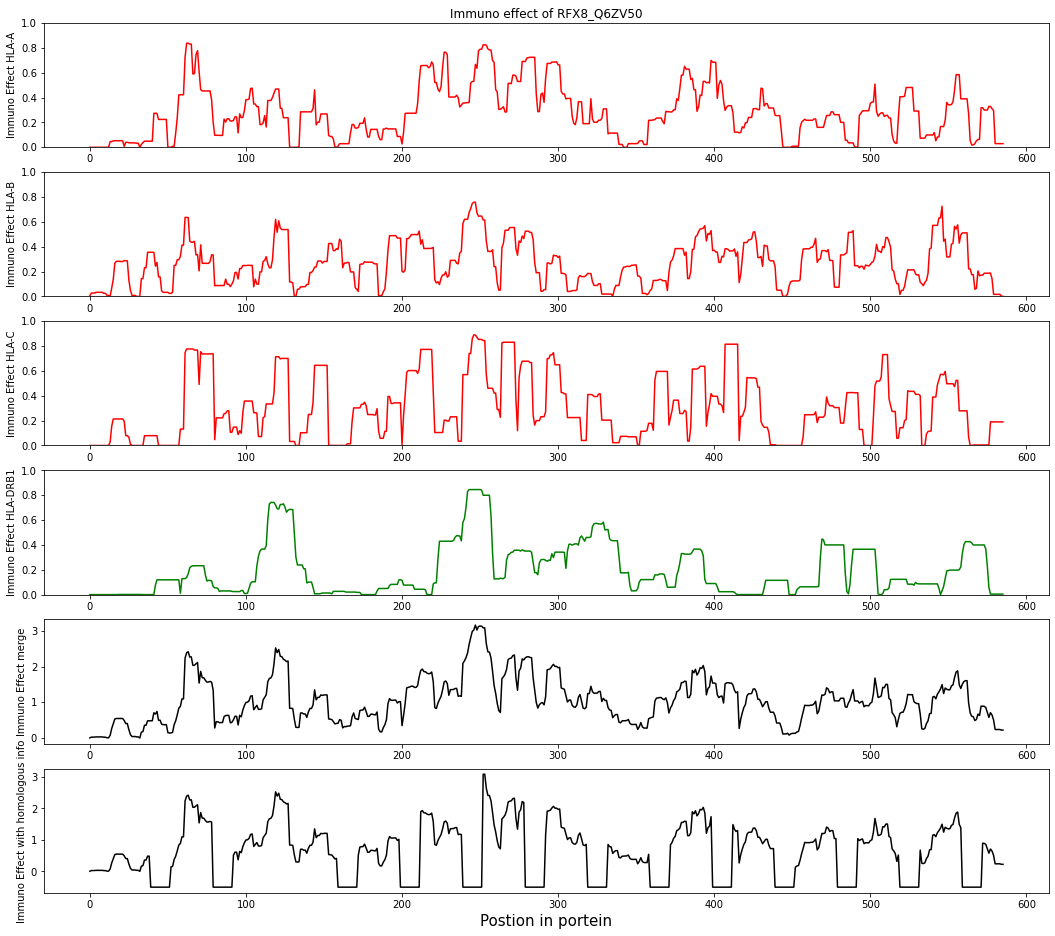

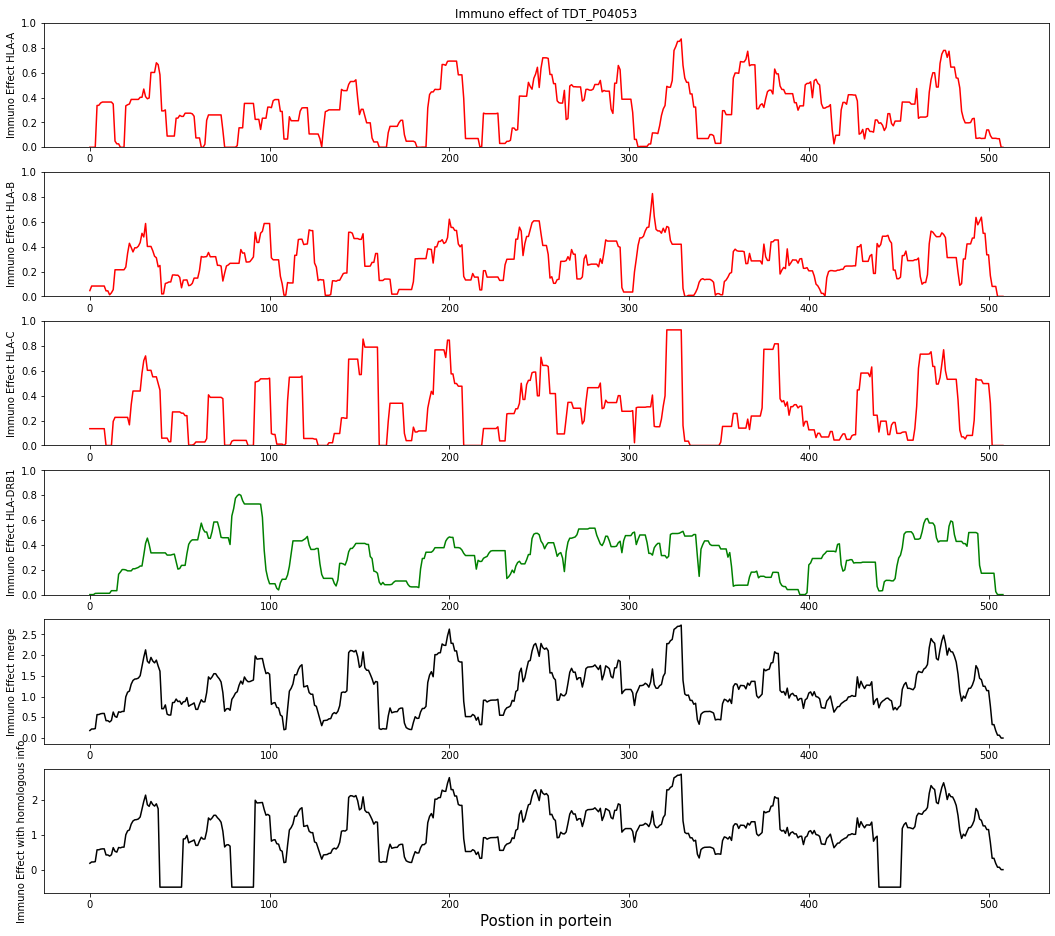

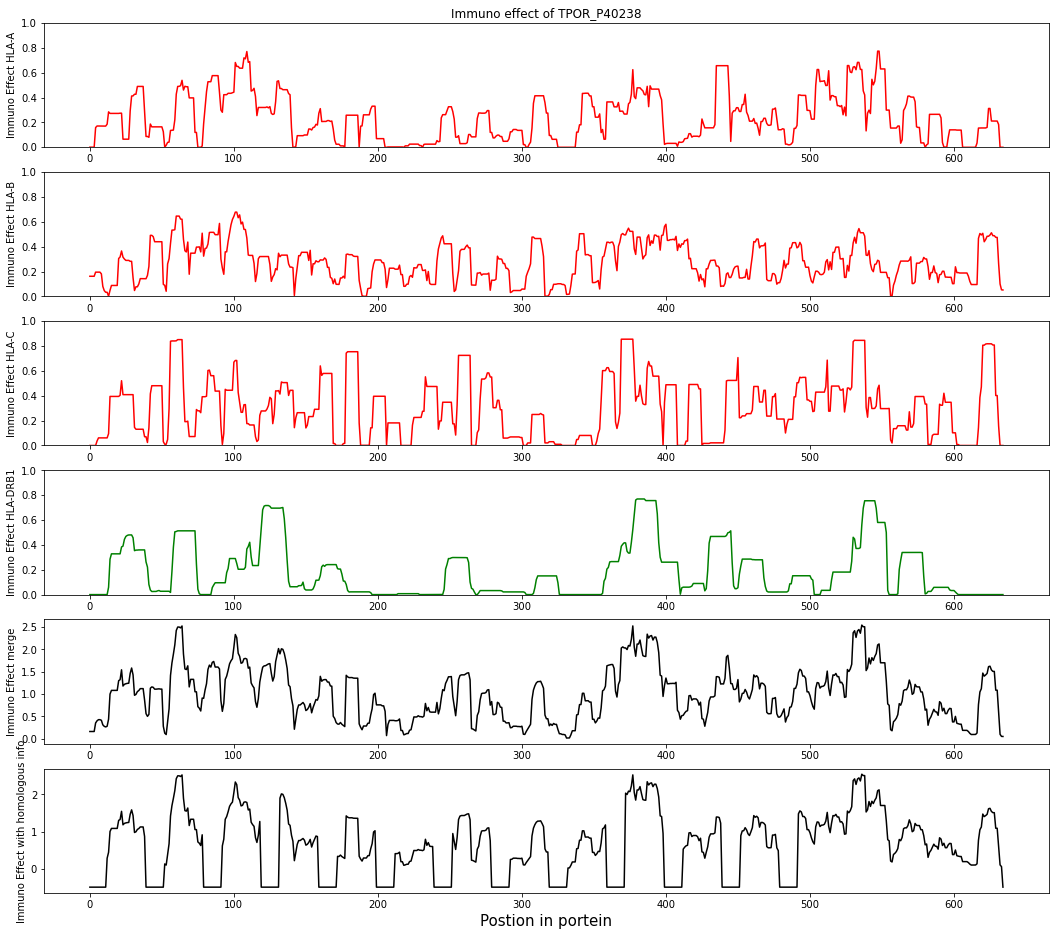

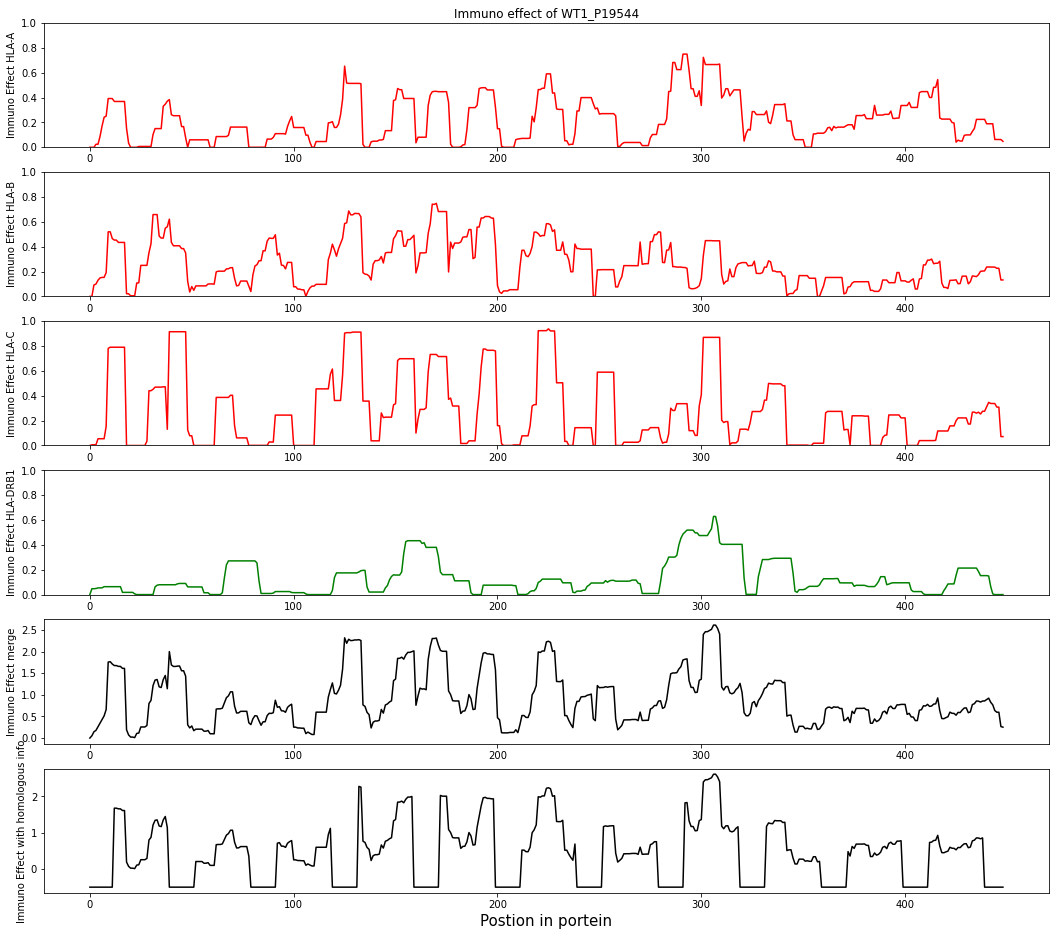

In [60]:
for TAA in Immuno_eff_all_allele_dict_withhomo:
    fig,(ax_hlaA,ax_hlaB,ax_hlaC,ax_hlaDRB1,ax_merge,ax_withhomo) = plt.subplots(6,1,figsize=(18,16))
    
    for allele in Immuno_eff_all_allele_dict_withhomo[TAA]:
        x = list(range(len(Immuno_eff_all_allele_dict_withhomo[TAA][allele])))
        y = Immuno_eff_all_allele_dict_withhomo[TAA][allele]
        if allele=="hlaA":
            ax_hlaA.plot(x,y,color="red")
            ax_hlaA.set_ylim(0,1)
            ax_hlaA.title.set_text("Immuno effect of {}".format(TAA))
            ax_hlaA.set_ylabel("Immuno Effect HLA-A",size=10)
        elif allele=="hlaB":
            ax_hlaB.plot(x,y,color="red")
            ax_hlaB.set_ylim(0,1)
            ax_hlaB.set_ylabel("Immuno Effect HLA-B",size=10)
        elif allele=="hlaC":
            ax_hlaC.plot(x,y,color="red")
            ax_hlaC.set_ylim(0,1)
            ax_hlaC.set_ylabel("Immuno Effect HLA-C",size=10)
        elif allele=="hlaDRB1":
            ax_hlaDRB1.plot(x,y,color="green")
            ax_hlaDRB1.set_ylim(0,1)
            ax_hlaDRB1.set_ylabel("Immuno Effect HLA-DRB1",size=10)
        elif allele=="allele_merge":
            ax_merge.plot(x,y,color="black")
            #ax_merge.set_ylim(0.0,5.0)
            ax_merge.set_ylabel("Immuno Effect merge",size=10)
        elif allele=="withhomo":
            ax_withhomo.plot(x,y,color="black")
            #ax_merge.set_ylim(0.0,5.0)
            ax_withhomo.set_xlabel("Postion in portein",size=15)
            ax_withhomo.set_ylabel("Immuno Effect with homologous info",size=10)
    plt.show()
    #input("please enter your input")